In [9]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import (LinearRegression, TheilSenRegressor,
                                  HuberRegressor, TweedieRegressor)

from sklearn.ensemble import (RandomForestRegressor, BaggingRegressor,
                              GradientBoostingRegressor, AdaBoostRegressor,
                              ExtraTreesRegressor)

import warnings
warnings.filterwarnings('ignore')

In [10]:
#loading the dataset
df = pd.read_csv("C:/Users/Sordhiq/Desktop/Dataset/global air pollution dataset.csv")
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [11]:
#looking at the dimension of the AQI
df.shape
print (f'The dataset has {df.shape[0]} Rows and {df.shape[1]} Columns')

The dataset has 23463 Rows and 12 Columns


In [12]:
#Number of unique Countries and Cities in our dataset
df[['Country', 'City']].nunique()

Country      175
City       23462
dtype: int64

In [13]:
#looking at the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [14]:
#looking at the statistical distribution of the Air Quality Index
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [15]:
#looking out for missing data from the table
df.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

<AxesSubplot:>

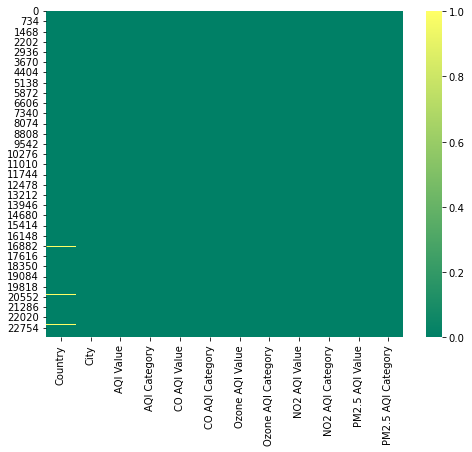

In [16]:
#visualizing missing data
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='summer')

In [17]:
#filling up missing data with the Mode of the distribution
df['Country'].replace(np.nan, df['Country'].mode, inplace=True)
df['City'].fillna(df['City'].mode, inplace=True)

In [18]:
df.isna().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [19]:
#looking out for correlation among variables
correlation = df.corr()
correlation

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.430602,0.405310,0.231758,0.984327
CO AQI Value,0.430602,1.000000,0.145724,0.488092,0.438557
Ozone AQI Value,0.405310,0.145724,1.000000,-0.181818,0.339887
NO2 AQI Value,0.231758,0.488092,-0.181818,1.000000,0.260127
PM2.5 AQI Value,0.984327,0.438557,0.339887,0.260127,1.000000


<AxesSubplot:>

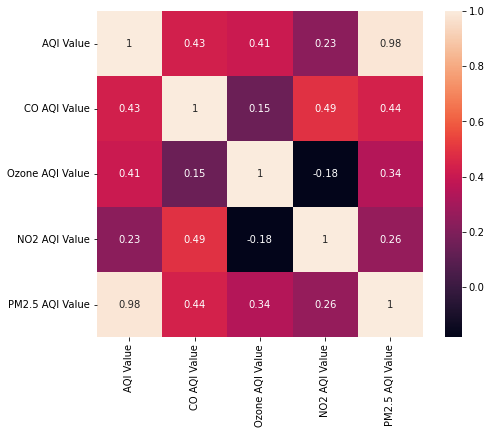

In [20]:
#Correlation on heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cbar=True, square=True)

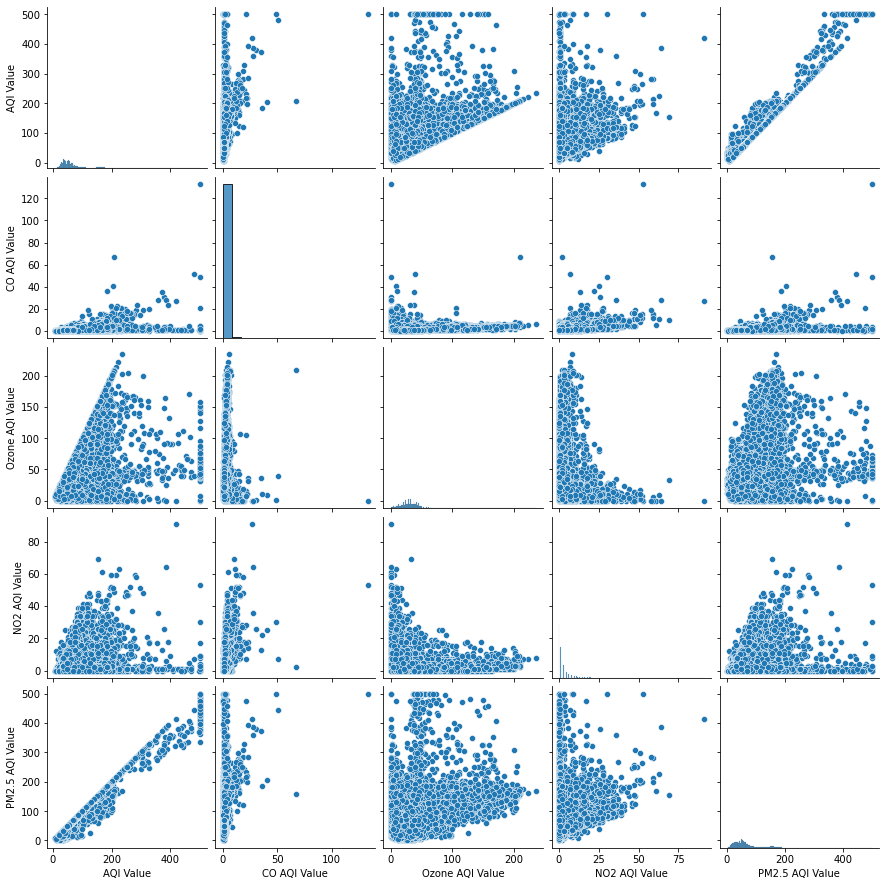

In [21]:
#visualizing the distribution of the dataset
sns.pairplot(df)

In [22]:
#Countries with the highest values of AQI (Very Unhealthy)
AQI_by_Country = df.groupby(['Country'], dropna=True).sum().sort_values(by='AQI Value', ascending=False)
AQI_by_Country.head(10)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
Country,,,,,
India,380575,4338,136993,4889,371864
United States of America,171575,4184,79324,24531,166724
China,100928,2717,70214,5639,88804
Brazil,69626,1569,19493,3549,68764
Germany,64892,1098,47768,2683,62185
Italy,60702,1108,42901,2302,55125
Pakistan,54888,637,27367,637,53145
Russian Federation,52751,1293,42359,1379,42831
Mexico,52648,1029,9893,2897,52504


In [23]:
#Countries with the least values of AQI (Good)
AQI_by_Country = df.groupby(['Country'], dropna=True).sum().sort_values(by='AQI Value', ascending=True)
AQI_by_Country.head(20)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
Country,,,,,
Palau,16,0,16,0,7
Solomon Islands,18,0,18,0,6
Maldives,19,0,19,0,15
Seychelles,26,0,25,0,26
Vanuatu,30,0,25,0,30
Bhutan,52,2,42,0,52
Monaco,56,1,56,1,42
Iceland,69,3,69,0,55
Barbados,73,0,24,0,73


In [24]:
#Cities with the highest values of AQI (Very Unhealthy)
AQI_by_Cities = df.groupby(['City', 'Country'], dropna=True).sum()
AQI_by_Cities.sort_values(by=['AQI Value'], ascending=False).head(20)

,,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
City,Country,,,,,
Ladnun,India,500,0,32,0,474
Jodhpur,India,500,0,34,0,378
Julana,India,500,1,41,1,490
Giddarbaha,India,500,1,45,0,416
Kakrala,India,500,2,95,2,478
Sujangarh,India,500,1,37,0,457
Nilokheri,India,500,1,46,1,500
Bareli,India,500,1,68,1,478
Kandhla,India,500,3,53,8,500


In [25]:
#Cities with the least values of AQi (Good)
AQI_by_Cities = df.groupby(['City', 'Country'], dropna=True).sum()
AQI_by_Cities.sort_values(by=['AQI Value'], ascending=True).head(20)

,,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
City,Country,,,,,
El Torno,Bolivia (Plurinational State of),6,0,5,0,6
Macas,Ecuador,7,1,7,0,7
Tari,Papua New Guinea,8,0,8,0,7
Azogues,Ecuador,8,0,7,0,8
Huaraz,Peru,9,0,9,0,8
Manokwari,Indonesia,10,0,10,0,10
Huancavelica,Peru,10,0,2,1,10
Junin,Peru,10,0,6,1,10
Guapi,Colombia,10,1,10,0,10


In [26]:
#feature extraction for model building 
df = df.drop(['Country','City','AQI Category','CO AQI Category','Ozone AQI Category', 'NO2 AQI Category','PM2.5 AQI Category'], axis=1)
df

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6
...,...,...,...,...,...
23458,184,3,154,2,184
23459,50,1,20,5,50
23460,50,1,22,1,50
23461,71,1,44,2,71


In [27]:
#instantiating the standard scaler
scaler = StandardScaler()

In [28]:
X = df.drop(['AQI Value'], axis=1)
y = df['AQI Value']
X = scaler.fit_transform(X)
X

array([[-0.2010711 ,  0.02869554, -0.58304831, -0.31973111],
       [-0.2010711 , -1.07458094, -0.39271701, -0.5022286 ],
       [-0.2010711 ,  0.13546423, -0.2023857 , -0.04598489],
       ...,
       [-0.2010711 , -0.46955836, -0.39271701, -0.33798086],
       [-0.2010711 ,  0.31341205, -0.2023857 ,  0.04526386],
       [-0.2010711 ,  0.09987466, -0.58304831,  0.02701411]])

In [29]:
#partitioning the data into train and test data respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [30]:
#instantiating and fitting the regression models respectively

Theil = TheilSenRegressor()
Theil.fit(X_train, y_train)

%time
Huber = HuberRegressor()
Huber.fit(X_train, y_train)

%timeit
Linear = LinearRegression()
Linear.fit(X_train, y_train)

Tweedie = TweedieRegressor()
Tweedie.fit(X_train, y_train)
%timeit

Neighbor = KNeighborsRegressor()
Neighbor.fit(X_train, y_train)
%time

CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
#writing a function to evaluate the Root Mean Squared Error (RMSE) of all fitted models
def RMSE (model):
    pred = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(pred, y_test))
    return rmse

In [32]:
RMSE(Huber)

10.220632200936826

In [33]:
RMSE(Theil) 

10.219313877713128

In [34]:
RMSE(Neighbor)

6.3333117259006135

In [35]:
RMSE(Linear)

8.756349493017446

In [36]:
#applying ensembling techniques to obtain improved models
models = [('Linear',Linear), ('KNeighbor',Neighbor), ('TheilSen',Theil)]
cv = [0.1, 1, 10, 100, 150, 200]
estimator = Neighbor

In [37]:
#instantiating and fitting the ensemble methods respective
Bag = BaggingRegressor(random_state=11, base_estimator=estimator, n_estimators=11)
Bag.fit(X_train, y_train)

Ada = AdaBoostRegressor(random_state=11, base_estimator=Neighbor)
Ada.fit(X_train, y_train)

Gradient = GradientBoostingRegressor(random_state=11, n_estimators=11)
Gradient.fit(X_train, y_train)

ExtraT = ExtraTreesRegressor(random_state=11, n_estimators=11)
ExtraT.fit(X_train, y_train)

Rand = RandomForestRegressor()
Rand.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
RMSE(Bag)

6.638541733421458

In [39]:
RMSE(Ada)

6.221219093931892

In [40]:
RMSE(Gradient)

19.99725255086669

In [41]:
RMSE(ExtraT)

2.739720027743233

In [42]:
RMSE(Rand)

2.8602483989110556

In [43]:
#Since the ExtraTreeRegression had the least RMSE, it will be adopted for
test_pred = ExtraT.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(test_pred, y_test))
test_rmse


2.739720027743233

In [44]:
ExtraT.predict(X_test)

array([ 25.,  28., 101., ...,  50.,  56.,  56.])

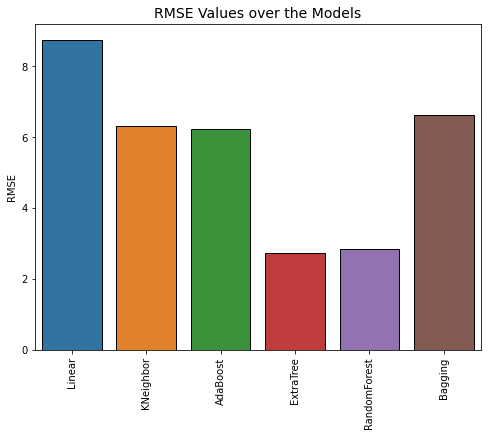

In [45]:
#comparing the most efficient models based on their RMSE
fig,axis = plt.subplots(figsize=(8, 6))
rmse_x = ['Linear', 'KNeighbor', 'AdaBoost', 'ExtraTree', 'RandomForest', 'Bagging']
rmse_y = [RMSE(Linear), RMSE(Neighbor), RMSE(Ada), RMSE(ExtraT), RMSE(Rand), RMSE(Bag)]

ax = sns.barplot(x=rmse_x, y=rmse_y, edgecolor='black')
plt.title("RMSE Values over the Models", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("RMSE")

plt.show()

### Findings

The dataset is a collection of Air Quality Index (AQI) data from 175 Countries across 23,642 Cities of the World, comprising 12 features

The 12 features contained in the AQI data are: [Country, City, AQI Value, AQI Category, CO AQI Value, CO AQI Category, Ozone AQI Value, Ozone AQI Category, NO2 AQI Value, NO2 AQI Category, PM2.5 AQI Value, PM2.5 AQI Category].

The essence of this work is to predict the Overall Air Quality (and invariably the category) of any Country given; Carbon monoxide (CO), Ozone (O3), Nitrous oxide (NO2) and Particulate Matter (PM2.5) Values

The AQI values are graded between 0 to 500 as follows: 0-50 (Good), 51-100 (Moderate), 101-150 (Unhealthy for Sensitive Groups), 151-200 (Unhealthy), 201-300 (Very Unhealthy), 301-500 (Hazardous)

With all air quality values captured beginning from the ground state (0), their averages and maximum values tend to vary markedly. As seen on their mean and max respectively; Overall AQI (72.01, 500), CO AQI (1.37, 133), Ozone AQI (35.19, 235.00), NO2 AQI (3.06, 91.09) PM2.5 AQI (68.52, 500.00)

The correlation analysis among the variables revealed that;

i. There is a strong positive correlation between Overall AIQ and the PM2.5 - meaning as PM2.5 increases, the Overall Air Quality also increases

ii. There is also a negative correlation between Nitrous oxides and the Ozone contents in the atmosphere - meaning when Nitrous contents increases, the atmospheric Ozone contents reduces

iii. There is a moderate positive correlation between Nitrous oxides and Carbon monoxide contents captured from the atmosphere

iv. Some of the gases (Ozone) captured are Green House Gases (GHG) responsible for exaccerbating climate change

The top 5 Countries with the highest levels of AQI are India, United States of America, China, Brazil and Germany - a trend synonymous with densely populated and industrialized Countries. Similarly, The top 5 Countries with the least levels of recorded AQI are Palau, Solomon Islands, Maldives, Seychelles, Vanuatu - a trend synonymous with sparsely populated coastal States. Hence it suffices to say that the higher the population and industrial activities, the higher the level of AQI in the State and vice versa.

Consequently, Indian cities of Ladnun, Jodhpur, Julana, Giddarbaha and Kakrala tops the chat for Cities on the hazardous categories of AQI recorded as El Torno	(Plurinational State of Bolivia), Macas	(Ecuador), Tari	(Papua New Guinea), Azogues	(Ecuador) and Huaraz (Peru) tops the 5 list for Cities with Good Overall AQI.

Among the several Regression models attempted at modelling the AQI Prediction solution, Root Mean Squared Error (RMSE) was used in evaluating each of their efficiencies. This is each each model and their respective RMSE values; Linear=8.76 , KNearestNeighbor=6.33, BoostEnsembling=6.22, ExtraTree=2.74 and RandomForest=2.84. From all indications, the ExtraTreeRegression models fits the data properly and had the least RMSE value. Hence, was adopted for the AQI Prediction Model.

As a result, efforts should be made in reducing and stemming the level of atmospheric pollution and thus improving the health of people across the world.

